<a href="https://colab.research.google.com/github/rpaulos/condo-price-prediction/blob/main/data_cleaner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

#Data Cleaning

In [106]:
df = pd.read_csv('condo.csv')
df.head()

,Name,Price,Link,Amenities,Long Term,Minimum Stay,City,Neighborhood,Location,Floor,...,gym,restaurant,bank,pharmacy,police,subway_station,train_station,university,transit_station,bus_station
0,Semi Furnished Studio Unit at Residencia de Re...,12000,https://rentpad.com.ph/long-term-rentals/quezo...,24/7 Security; Swimming pool,"12,000 /Month",1 Year,Quezon City,Loyola Heights,Residencia de Regina,6.0,...,1,1,1,1,1,0,1,1,1,0
1,FOR LEASE 1 BR Condo Unit at High Park Towers ...,58000,https://rentpad.com.ph/long-term-rentals/quezo...,NaN,"58,000 /Month",1 Year,Quezon City,Diliman,High Park Vertis,15.0,...,1,1,1,1,1,0,0,1,1,1
2,1BR Fully Furnished Unit at Trees Residences Q...,14000,https://rentpad.com.ph/long-term-rentals/quezo...,Multi-Purpose Hall; 24/7 Security; Function Ro...,"14,000 /Month",6 Months,Quezon City,Novaliches,Trees Residences,7.0,...,1,1,1,1,1,0,0,1,1,0
3,Studio Unit in Studio A Katipunan,22000,https://rentpad.com.ph/long-term-rentals/quezo...,Gym; Study Hall; 24/7 Security; Swimming pool,"22,000 /Month",1 Year,Quezon City,Loyola Heights,Studio A,27.0,...,1,1,1,1,1,0,1,1,1,0
4,Unfurnished 2BR Condo Trees Residences near SM...,18000,https://rentpad.com.ph/long-term-rentals/quezo...,Concierge; Jogging Trail; Gym; 24/7 Security; ...,"18,000 /Month",1 Year,Quezon City,Novaliches,Trees Residences,7.0,...,1,1,1,1,0,0,0,1,1,1


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             1659 non-null   object 
 1   Price            1659 non-null   int64  
 2   Link             1659 non-null   object 
 3   Amenities        1544 non-null   object 
 4   Long Term        1655 non-null   object 
 5   Minimum Stay     1640 non-null   object 
 6   City             1651 non-null   object 
 7   Neighborhood     1523 non-null   object 
 8   Location         1510 non-null   object 
 9   Floor            1247 non-null   float64
 10  Square Area      1650 non-null   float64
 11  Bedrooms         1659 non-null   int64  
 12  Bathrooms        1659 non-null   int64  
 13  Security         1426 non-null   float64
 14  Pool             1377 non-null   float64
 15  Airconditioning  476 non-null    float64
 16  Parking          557 non-null    float64
 17  Balcony       

In [108]:
drop_col=['Name', 'Link', 'Long Term', 'Minimum Stay', 'City', 'Location', 'Updated', 'Latitude', 'Longitude', 'Address', 'Province', 'Region']
df.drop(drop_col, axis=1, inplace=True)

In [109]:
amenities_list = df['Amenities'].str.split(';').explode()

unique_amenities = amenities_list.dropna().str.strip().unique()

for amenity in unique_amenities:
    if amenity:
        df[amenity] = df['Amenities'].fillna('').str.contains(amenity).astype(int)

df.drop('Amenities', axis=1, inplace=True)

display(df.head())

,Price,Neighborhood,Floor,Square Area,Bedrooms,Bathrooms,Security,Pool,Airconditioning,Parking,...,24/7 Security,Swimming pool,Multi-Purpose Hall,Function Rooms,Gym,Study Hall,Concierge,Jogging Trail,Play Room,Storage Space
0,12000,Loyola Heights,6.0,25.0,0,1,1.0,1.0,NaN,0,...,1,1,0,0,0,0,0,0,0,0
1,58000,Diliman,15.0,61.0,1,1,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
2,14000,Novaliches,7.0,25.0,1,1,1.0,1.0,NaN,0,...,1,1,1,1,0,0,0,0,0,0
3,22000,Loyola Heights,27.0,28.0,0,1,1.0,1.0,NaN,0,...,1,1,0,0,1,1,0,0,0,0
4,18000,Novaliches,7.0,30.0,2,1,1.0,1.0,NaN,0,...,1,1,0,0,1,0,1,1,0,0


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price               1659 non-null   int64  
 1   Neighborhood        1523 non-null   object 
 2   Floor               1247 non-null   float64
 3   Square Area         1650 non-null   float64
 4   Bedrooms            1659 non-null   int64  
 5   Bathrooms           1659 non-null   int64  
 6   Security            1426 non-null   float64
 7   Pool                1377 non-null   float64
 8   Airconditioning     476 non-null    float64
 9   Parking             1659 non-null   int64  
 10  Balcony             1659 non-null   int64  
 11  Pets Allowed        1659 non-null   int64  
 12  Furnishing          1659 non-null   object 
 13  Rating              1084 non-null   float64
 14  ReviewsCount        1084 non-null   float64
 15  school              1659 non-null   int64  
 16  hospit

In [111]:
label_encoder = LabelEncoder()
df['Neighborhood'] = label_encoder.fit_transform(df['Neighborhood'])
df['Furnishing'] = label_encoder.fit_transform(df['Furnishing'])

drop_col=['Pool', '24/7 Security']
df.drop(drop_col, axis=1, inplace=True)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price               1659 non-null   int64  
 1   Neighborhood        1659 non-null   int64  
 2   Floor               1247 non-null   float64
 3   Square Area         1650 non-null   float64
 4   Bedrooms            1659 non-null   int64  
 5   Bathrooms           1659 non-null   int64  
 6   Security            1426 non-null   float64
 7   Airconditioning     476 non-null    float64
 8   Parking             1659 non-null   int64  
 9   Balcony             1659 non-null   int64  
 10  Pets Allowed        1659 non-null   int64  
 11  Furnishing          1659 non-null   int64  
 12  Rating              1084 non-null   float64
 13  ReviewsCount        1084 non-null   float64
 14  school              1659 non-null   int64  
 15  hospital            1659 non-null   int64  
 16  shoppi

In [113]:
df.head()

,Price,Neighborhood,Floor,Square Area,Bedrooms,Bathrooms,Security,Airconditioning,Parking,Balcony,...,bus_station,Swimming pool,Multi-Purpose Hall,Function Rooms,Gym,Study Hall,Concierge,Jogging Trail,Play Room,Storage Space
0,12000,7,6.0,25.0,0,1,1.0,NaN,0,0,...,0,1,0,0,0,0,0,0,0,0
1,58000,3,15.0,61.0,1,1,NaN,NaN,0,0,...,1,0,0,0,0,0,0,0,0,0
2,14000,10,7.0,25.0,1,1,1.0,NaN,0,0,...,0,1,1,1,0,0,0,0,0,0
3,22000,7,27.0,28.0,0,1,1.0,NaN,0,0,...,0,1,0,0,1,1,0,0,0,0
4,18000,10,7.0,30.0,2,1,1.0,NaN,0,0,...,1,1,0,0,1,0,1,1,0,0


In [114]:
mean_imputer = SimpleImputer(strategy='mean')
df['Rating'] = mean_imputer.fit_transform(df[['Rating']])

median_imputer = SimpleImputer(strategy='median')
df['Floor'] = median_imputer.fit_transform(df[['Floor']])
df['Square Area'] = median_imputer.fit_transform(df[['Square Area']])
df['ReviewsCount'] = median_imputer.fit_transform(df[['ReviewsCount']])

In [115]:
df.head()

,Price,Neighborhood,Floor,Square Area,Bedrooms,Bathrooms,Security,Airconditioning,Parking,Balcony,...,bus_station,Swimming pool,Multi-Purpose Hall,Function Rooms,Gym,Study Hall,Concierge,Jogging Trail,Play Room,Storage Space
0,12000,7,6.0,25.0,0,1,1.0,NaN,0,0,...,0,1,0,0,0,0,0,0,0,0
1,58000,3,15.0,61.0,1,1,NaN,NaN,0,0,...,1,0,0,0,0,0,0,0,0,0
2,14000,10,7.0,25.0,1,1,1.0,NaN,0,0,...,0,1,1,1,0,0,0,0,0,0
3,22000,7,27.0,28.0,0,1,1.0,NaN,0,0,...,0,1,0,0,1,1,0,0,0,0
4,18000,10,7.0,30.0,2,1,1.0,NaN,0,0,...,1,1,0,0,1,0,1,1,0,0


In [116]:
df.fillna(0, inplace=True)
display(df.head())

,Price,Neighborhood,Floor,Square Area,Bedrooms,Bathrooms,Security,Airconditioning,Parking,Balcony,...,bus_station,Swimming pool,Multi-Purpose Hall,Function Rooms,Gym,Study Hall,Concierge,Jogging Trail,Play Room,Storage Space
0,12000,7,6.0,25.0,0,1,1.0,0.0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,58000,3,15.0,61.0,1,1,0.0,0.0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,14000,10,7.0,25.0,1,1,1.0,0.0,0,0,...,0,1,1,1,0,0,0,0,0,0
3,22000,7,27.0,28.0,0,1,1.0,0.0,0,0,...,0,1,0,0,1,1,0,0,0,0
4,18000,10,7.0,30.0,2,1,1.0,0.0,0,0,...,1,1,0,0,1,0,1,1,0,0


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price               1659 non-null   int64  
 1   Neighborhood        1659 non-null   int64  
 2   Floor               1659 non-null   float64
 3   Square Area         1659 non-null   float64
 4   Bedrooms            1659 non-null   int64  
 5   Bathrooms           1659 non-null   int64  
 6   Security            1659 non-null   float64
 7   Airconditioning     1659 non-null   float64
 8   Parking             1659 non-null   int64  
 9   Balcony             1659 non-null   int64  
 10  Pets Allowed        1659 non-null   int64  
 11  Furnishing          1659 non-null   int64  
 12  Rating              1659 non-null   float64
 13  ReviewsCount        1659 non-null   float64
 14  school              1659 non-null   int64  
 15  hospital            1659 non-null   int64  
 16  shoppi

#Data Visualization

Text(0.5, 1.0, "['Bathrooms and Price']")

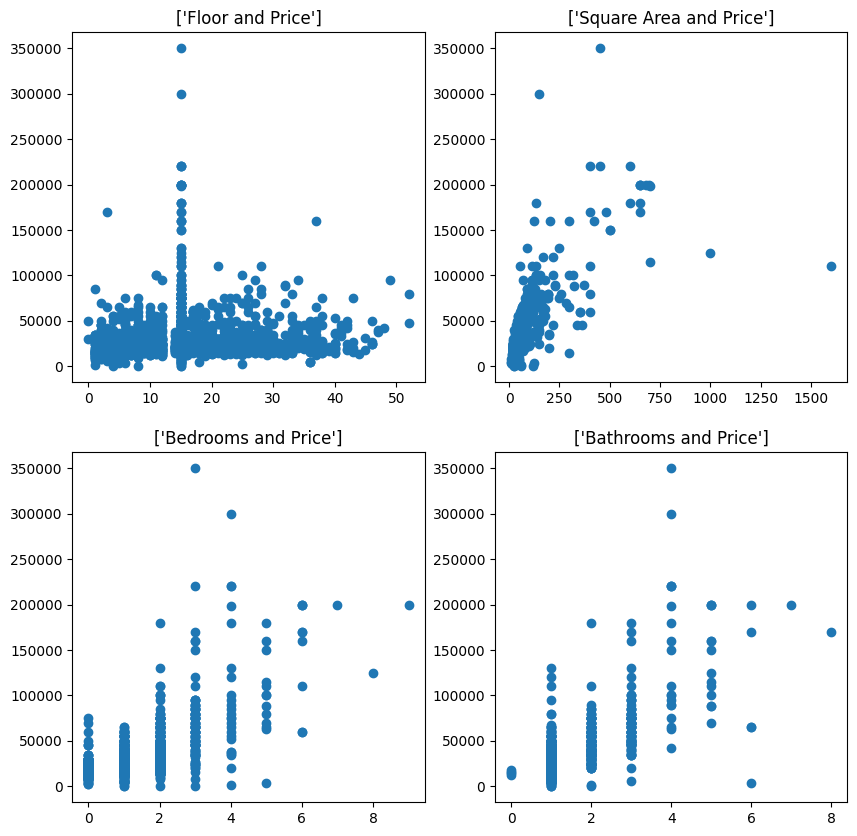

In [118]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].scatter(df["Floor"], df["Price"])
ax[0, 1].scatter(df["Square Area"], df["Price"])
ax[1, 0].scatter(df["Bedrooms"], df["Price"])
ax[1, 1].scatter(df["Bathrooms"], df["Price"])

ax[0, 0].set_title(["Floor and Price"])
ax[0, 1].set_title(["Square Area and Price"])
ax[1, 0].set_title(["Bedrooms and Price"])
ax[1, 1].set_title(["Bathrooms and Price"])

Text(0.5, 1.0, "['Balcony and Price']")

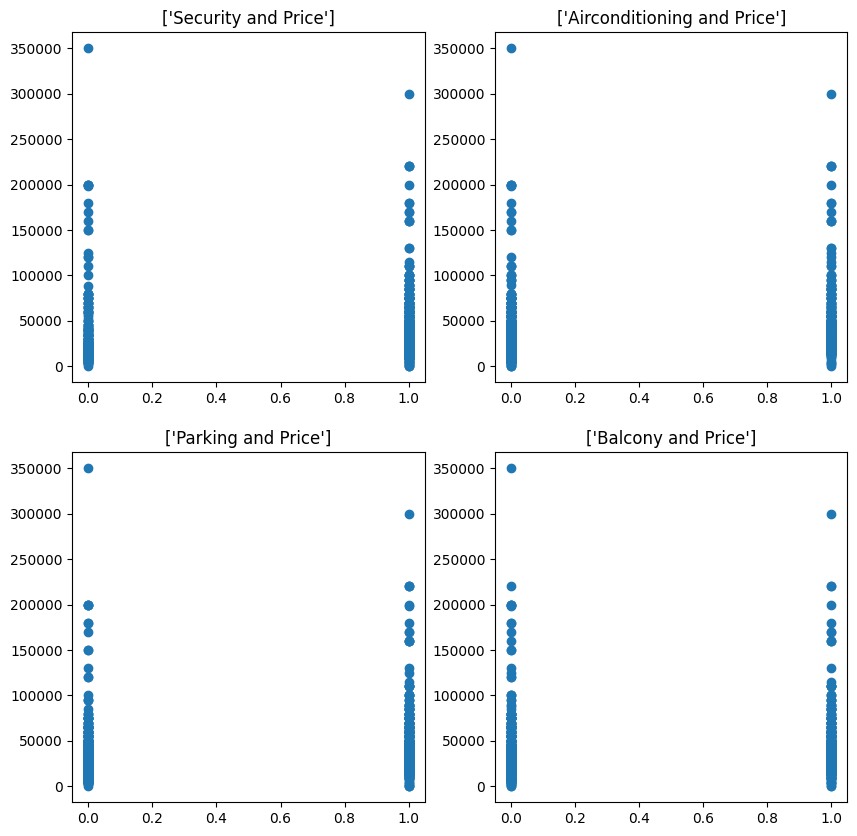

In [119]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].scatter(df["Security"], df["Price"])
ax[0, 1].scatter(df["Airconditioning"], df["Price"])
ax[1, 0].scatter(df["Parking"], df["Price"])
ax[1, 1].scatter(df["Balcony"], df["Price"])

ax[0, 0].set_title(["Security and Price"])
ax[0, 1].set_title(["Airconditioning and Price"])
ax[1, 0].set_title(["Parking and Price"])
ax[1, 1].set_title(["Balcony and Price"])

Text(0.5, 1.0, "['ReviewsCount and Price']")

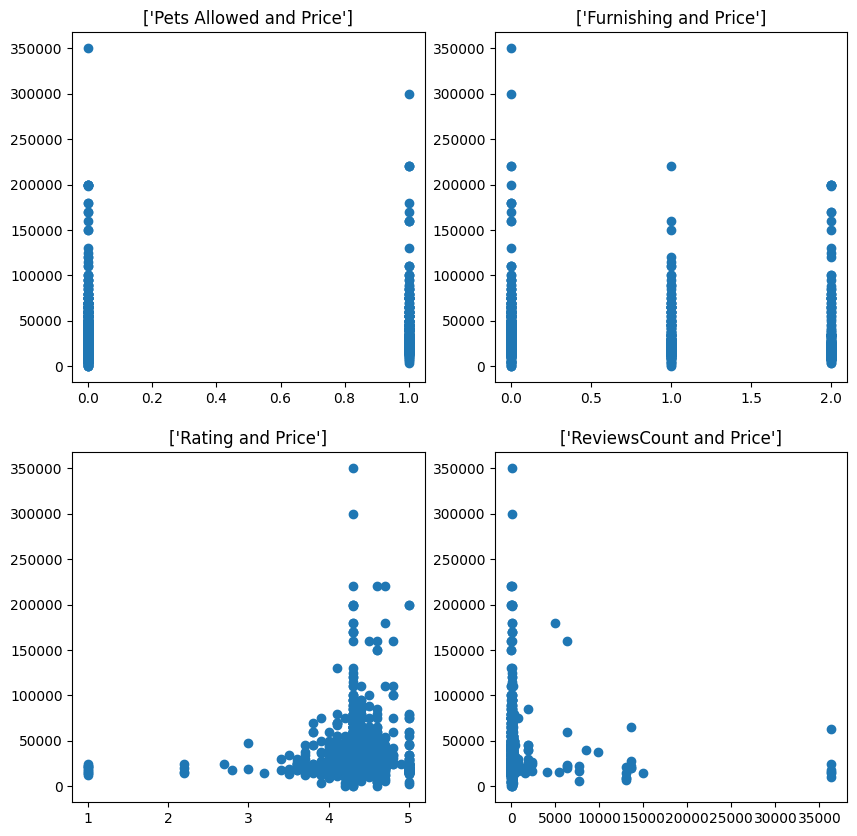

In [120]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].scatter(df["Pets Allowed"], df["Price"])
ax[0, 1].scatter(df["Furnishing"], df["Price"])
ax[1, 0].scatter(df["Rating"], df["Price"])
ax[1, 1].scatter(df["ReviewsCount"], df["Price"])

ax[0, 0].set_title(["Pets Allowed and Price"])
ax[0, 1].set_title(["Furnishing and Price"])
ax[1, 0].set_title(["Rating and Price"])
ax[1, 1].set_title(["ReviewsCount and Price"])

Text(0.5, 1.0, "['supermarket and Price']")

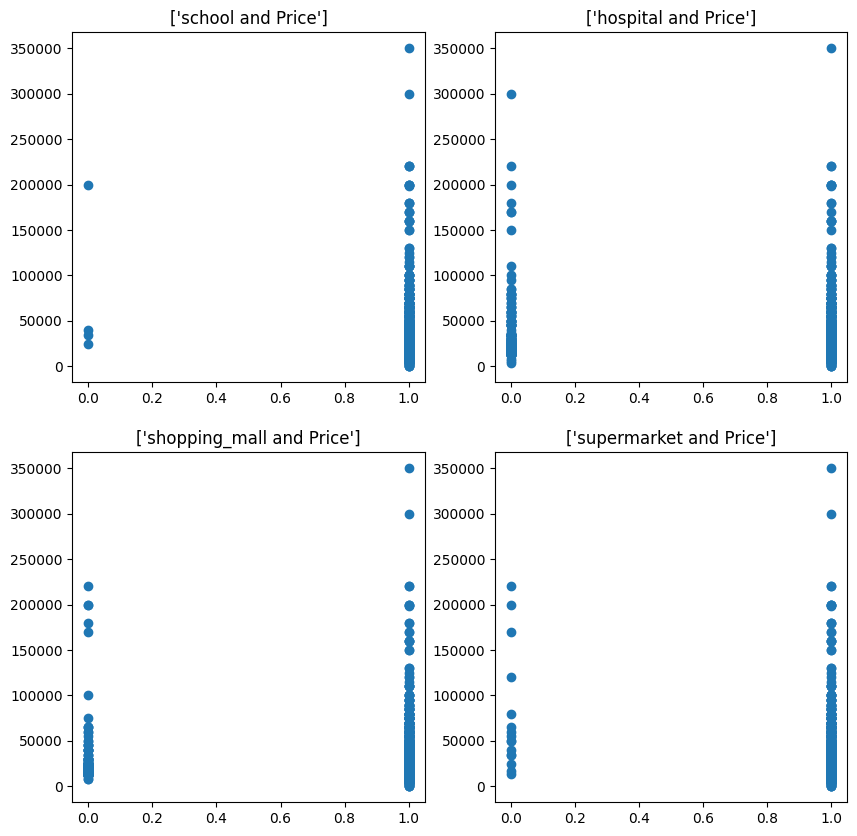

In [121]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].scatter(df["school"], df["Price"])
ax[0, 1].scatter(df["hospital"], df["Price"])
ax[1, 0].scatter(df["shopping_mall"], df["Price"])
ax[1, 1].scatter(df["supermarket"], df["Price"])

ax[0, 0].set_title(["school and Price"])
ax[0, 1].set_title(["hospital and Price"])
ax[1, 0].set_title(["shopping_mall and Price"])
ax[1, 1].set_title(["supermarket and Price"])

Text(0.5, 1.0, "['restaurant and Price']")

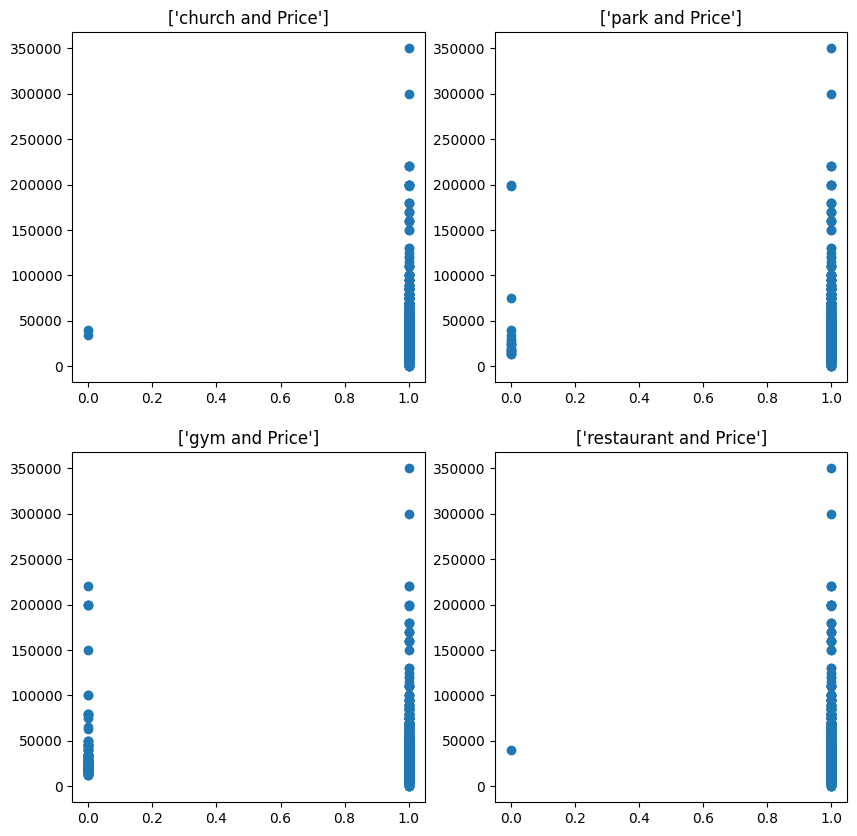

In [122]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].scatter(df["church"], df["Price"])
ax[0, 1].scatter(df["park"], df["Price"])
ax[1, 0].scatter(df["gym"], df["Price"])
ax[1, 1].scatter(df["restaurant"], df["Price"])

ax[0, 0].set_title(["church and Price"])
ax[0, 1].set_title(["park and Price"])
ax[1, 0].set_title(["gym and Price"])
ax[1, 1].set_title(["restaurant and Price"])

Text(0.5, 1.0, "['subway_station and Price']")

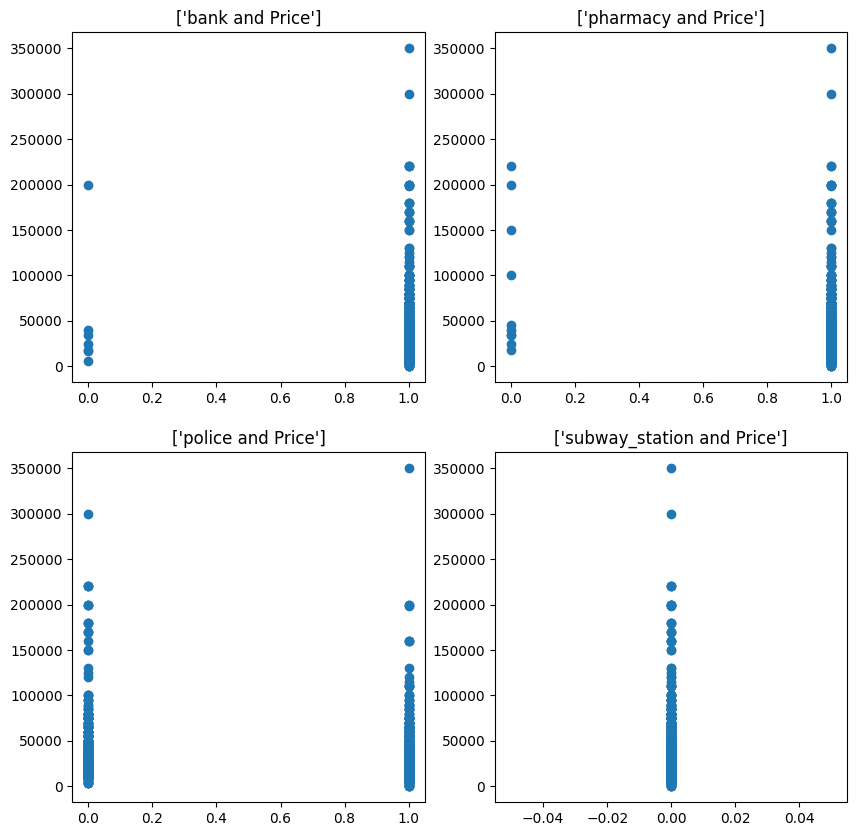

In [123]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].scatter(df["bank"], df["Price"])
ax[0, 1].scatter(df["pharmacy"], df["Price"])
ax[1, 0].scatter(df["police"], df["Price"])
ax[1, 1].scatter(df["subway_station"], df["Price"])

ax[0, 0].set_title(["bank and Price"])
ax[0, 1].set_title(["pharmacy and Price"])
ax[1, 0].set_title(["police and Price"])
ax[1, 1].set_title(["subway_station and Price"])

Text(0.5, 1.0, "['bus_station and Price']")

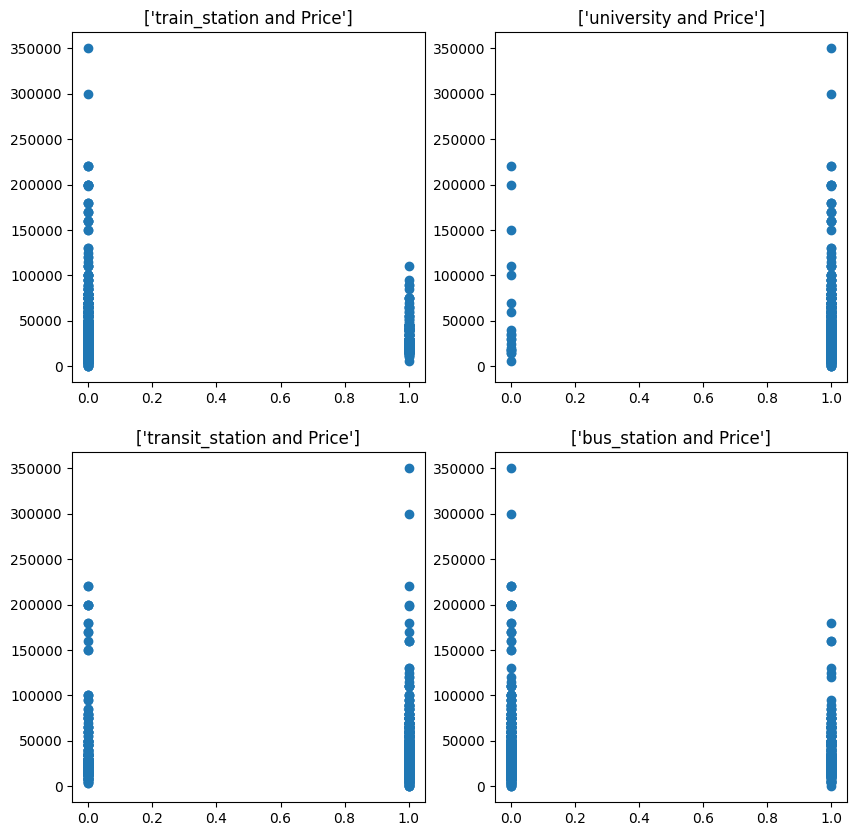

In [124]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].scatter(df["train_station"], df["Price"])
ax[0, 1].scatter(df["university"], df["Price"])
ax[1, 0].scatter(df["transit_station"], df["Price"])
ax[1, 1].scatter(df["bus_station"], df["Price"])

ax[0, 0].set_title(["train_station and Price"])
ax[0, 1].set_title(["university and Price"])
ax[1, 0].set_title(["transit_station and Price"])
ax[1, 1].set_title(["bus_station and Price"])

Text(0.5, 1.0, "['Gym and Price']")

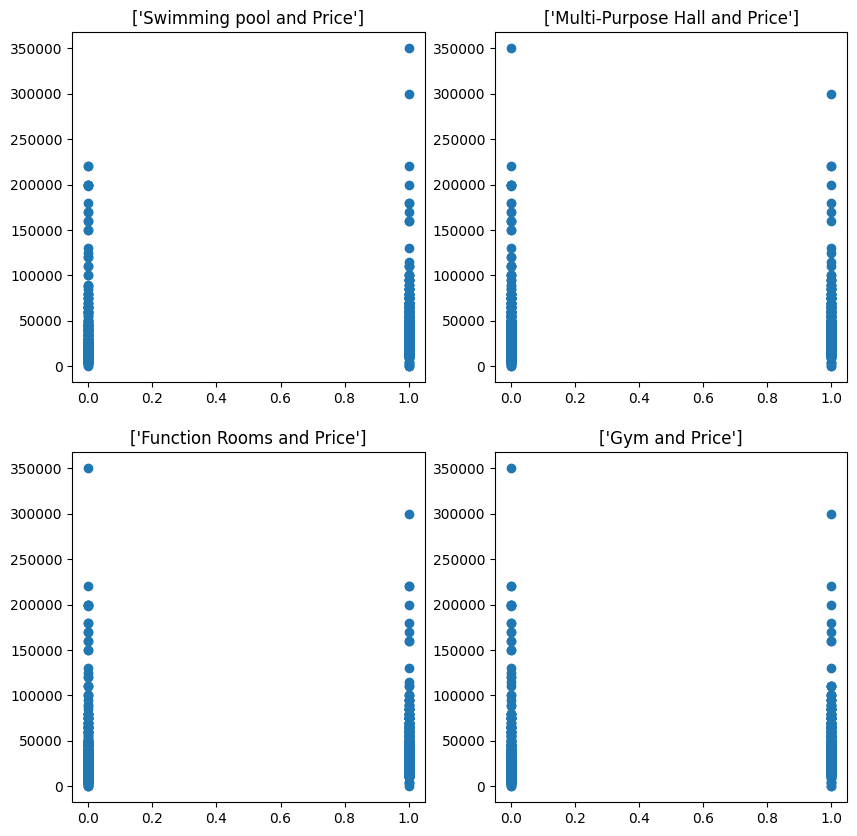

In [125]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].scatter(df["Swimming pool"], df["Price"])
ax[0, 1].scatter(df["Multi-Purpose Hall"], df["Price"])
ax[1, 0].scatter(df["Function Rooms"], df["Price"])
ax[1, 1].scatter(df["Gym"], df["Price"])

ax[0, 0].set_title(["Swimming pool and Price"])
ax[0, 1].set_title(["Multi-Purpose Hall and Price"])
ax[1, 0].set_title(["Function Rooms and Price"])
ax[1, 1].set_title(["Gym and Price"])

Text(0.5, 1.0, "['Play Room and Price']")

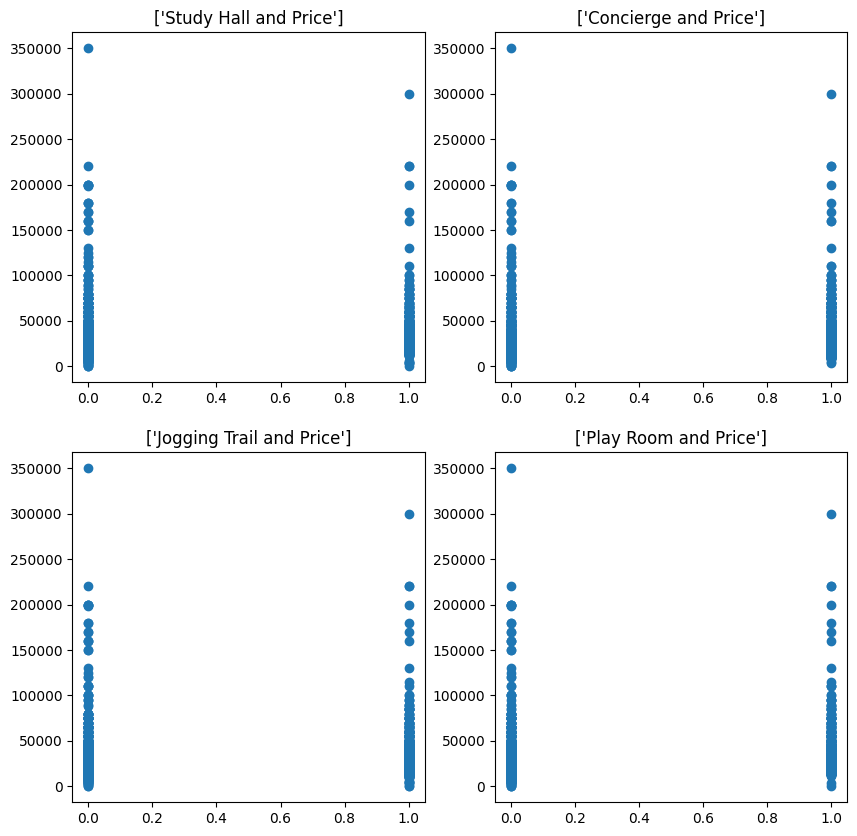

In [126]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].scatter(df["Study Hall"], df["Price"])
ax[0, 1].scatter(df["Concierge"], df["Price"])
ax[1, 0].scatter(df["Jogging Trail"], df["Price"])
ax[1, 1].scatter(df["Play Room"], df["Price"])

ax[0, 0].set_title(["Study Hall and Price"])
ax[0, 1].set_title(["Concierge and Price"])
ax[1, 0].set_title(["Jogging Trail and Price"])
ax[1, 1].set_title(["Play Room and Price"])

Text(0.5, 1.0, "['Storage Space and Price']")

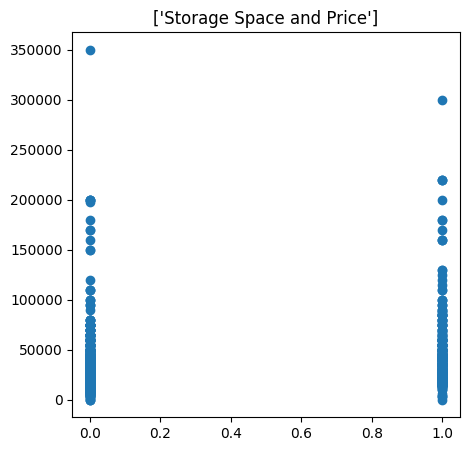

In [127]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.scatter(df["Storage Space"], df["Price"])

ax.set_title(["Storage Space and Price"])

In [128]:
df.to_csv('cleaned_data_condo.csv', index=False)

#Feature Engineering

In [129]:
df['occupancy'] = 0
df.loc[(df['Rating'] > 4.0) & (df['ReviewsCount'] > 75), 'occupancy'] = 1

display(df.head())

,Price,Neighborhood,Floor,Square Area,Bedrooms,Bathrooms,Security,Airconditioning,Parking,Balcony,...,Swimming pool,Multi-Purpose Hall,Function Rooms,Gym,Study Hall,Concierge,Jogging Trail,Play Room,Storage Space,occupancy
0,12000,7,6.0,25.0,0,1,1.0,0.0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,58000,3,15.0,61.0,1,1,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14000,10,7.0,25.0,1,1,1.0,0.0,0,0,...,1,1,1,0,0,0,0,0,0,1
3,22000,7,27.0,28.0,0,1,1.0,0.0,0,0,...,1,0,0,1,1,0,0,0,0,0
4,18000,10,7.0,30.0,2,1,1.0,0.0,0,0,...,1,0,0,1,0,1,1,0,0,0


In [130]:
df.to_csv('final_cleaned_data_condo.csv', index=False)